# Bibliothèques

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

# Charger les données

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Train_Data

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Valeurs manquantes 

### Commençons par la Colonne `Age`

In [4]:
display(HTML(train_data['Age'].to_frame().to_html()))

,Age
0,22.00
1,38.00
2,26.00
3,35.00
4,35.00
5,NaN
6,54.00
7,2.00
8,27.00
9,14.00


##### Il y a effectivement des valeurs manquantes dans la colonnes 'Age'. Même si nous n'en doutions pas, quelle est la stratégie a adopté pour remplacer ces valeurs manquantes par des valeurs plus pertinentes ? Essayons d'analyser les autres valeurs associées à ces valeurs manquantes. 

In [5]:
display(HTML(train_data[['Age', 'Name']].to_html()))

,Age,Name
0,22.00,"Braund, Mr. Owen Harris"
1,38.00,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)"
2,26.00,"Heikkinen, Miss. Laina"
3,35.00,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,35.00,"Allen, Mr. William Henry"
5,NaN,"Moran, Mr. James"
6,54.00,"McCarthy, Mr. Timothy J"
7,2.00,"Palsson, Master. Gosta Leonard"
8,27.00,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)"
9,14.00,"Nasser, Mrs. Nicholas (Adele Achem)"


En mettant en perspective la colonne `Name` avec la colonne `Age` on remarque qu'il y a des 'Titres' tels quel 'Mr', 'Mrs', 'Dr', 'Master', 'Miss', etc.. qui nous donne quelques indications sur l'âge que pourrait avoir nos personnes n'ayant pas leurs âges renseignés. Nous allons récupérer uniquement les lignes ayant des valeurs manquantes das la colonnes 'Age' et voir comment remplacer de façon pertinente ces valeurs.

In [6]:
# Filter rows where 'Age' is NaN
nan_age_rows = train_data[train_data['Age'].isna()]

display(HTML(nan_age_rows[['Age', 'Name']].to_html()))

,Age,Name
5,NaN,"Moran, Mr. James"
17,NaN,"Williams, Mr. Charles Eugene"
19,NaN,"Masselmani, Mrs. Fatima"
26,NaN,"Emir, Mr. Farred Chehab"
28,NaN,"O'Dwyer, Miss. Ellen ""Nellie"""
29,NaN,"Todoroff, Mr. Lalio"
31,NaN,"Spencer, Mrs. William Augustus (Marie Eugenie)"
32,NaN,"Glynn, Miss. Mary Agatha"
36,NaN,"Mamee, Mr. Hanna"
42,NaN,"Kraeff, Mr. Theodor"


In [7]:
display(HTML(train_data.to_html()))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.00,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,NaN,C


Après reflexion, l'idée serait de créer une feature supplémentaire 'Title' venant extraire de la colonne `Name` uniquement le titre.

In [8]:
# Define a function to extract titles
def extract_title(name):
    return name.split(',')[1].split('.')[0].strip()

# Apply the function to create a 'Title' column
train_data['Title'] = train_data['Name'].apply(extract_title)

display(HTML(train_data['Title'].to_frame().to_html()))

,Title
0,Mr
1,Mrs
2,Miss
3,Mrs
4,Mr
5,Mr
6,Mr
7,Master
8,Mrs
9,Mrs


In [9]:
# Count occurrences of each title within the train dataset
title_counts = train_data['Title'].value_counts()

print(title_counts)

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64


De cette nouvelle colonne `Titre` nous allons pouvoir déterminer la valeur median des âges sur otre datasets. Nous ferons ensuite correspondre cette valeur médiane par Titre à chaque personne du même titre n'ayant pas encore d'âge renseigné. 

In [10]:
selected_titles = ['Mr', 'Miss', 'Mrs', 'Master', 'Dr']
filtered_df = train_data[train_data['Title'].isin(selected_titles)]

# Calculate median age for each title
median_ages = filtered_df.groupby('Title')['Age'].median()

median_ages

Title
Dr        46.5
Master     3.5
Miss      21.0
Mr        30.0
Mrs       35.0
Name: Age, dtype: float64

In [11]:
# Filter rows where 'Age' is NaN
nan_age_rows = train_data[train_data['Age'].isna()]
display(HTML(nan_age_rows[['Age', 'Name', 'Title']].to_html()))

,Age,Name,Title
5,NaN,"Moran, Mr. James",Mr
17,NaN,"Williams, Mr. Charles Eugene",Mr
19,NaN,"Masselmani, Mrs. Fatima",Mrs
26,NaN,"Emir, Mr. Farred Chehab",Mr
28,NaN,"O'Dwyer, Miss. Ellen ""Nellie""",Miss
29,NaN,"Todoroff, Mr. Lalio",Mr
31,NaN,"Spencer, Mrs. William Augustus (Marie Eugenie)",Mrs
32,NaN,"Glynn, Miss. Mary Agatha",Miss
36,NaN,"Mamee, Mr. Hanna",Mr
42,NaN,"Kraeff, Mr. Theodor",Mr


In [12]:
# Count occurrences of each title
title_counts_nan_age_rows = nan_age_rows['Title'].value_counts()

print(title_counts_nan_age_rows)

Title
Mr        119
Miss       36
Mrs        17
Master      4
Dr          1
Name: count, dtype: int64


In [13]:
train_data['Age'].isnull().sum()

177

Il y a 177 Valeurs manquantes avant imputation

In [14]:
# Replace NaN values in nan_age_rows['Age'] with median values based on Title
for index, row in nan_age_rows.iterrows():
    title = row['Title']
    median_age = median_ages[title]
    nan_age_rows.loc[index, 'Age'] = median_age
    train_data.loc[index, 'Age'] = median_age

Assurons nous que les modifications on été réalisé conformément à nos attentes.

In [15]:
display(HTML(nan_age_rows[['Age', 'Name', 'Title']].to_html()))

,Age,Name,Title
5,30.0,"Moran, Mr. James",Mr
17,30.0,"Williams, Mr. Charles Eugene",Mr
19,35.0,"Masselmani, Mrs. Fatima",Mrs
26,30.0,"Emir, Mr. Farred Chehab",Mr
28,21.0,"O'Dwyer, Miss. Ellen ""Nellie""",Miss
29,30.0,"Todoroff, Mr. Lalio",Mr
31,35.0,"Spencer, Mrs. William Augustus (Marie Eugenie)",Mrs
32,21.0,"Glynn, Miss. Mary Agatha",Miss
36,30.0,"Mamee, Mr. Hanna",Mr
42,30.0,"Kraeff, Mr. Theodor",Mr


In [16]:
train_data['Age'].isnull().sum()

0

Il n'y a plus de valeurs manquantes dans notre colonne 'Age'.  

In [17]:
display(HTML(train_data[['Age', 'Name', 'Title']].to_html()))

,Age,Name,Title
0,22.00,"Braund, Mr. Owen Harris",Mr
1,38.00,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",Mrs
2,26.00,"Heikkinen, Miss. Laina",Miss
3,35.00,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
4,35.00,"Allen, Mr. William Henry",Mr
5,30.00,"Moran, Mr. James",Mr
6,54.00,"McCarthy, Mr. Timothy J",Mr
7,2.00,"Palsson, Master. Gosta Leonard",Master
8,27.00,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",Mrs
9,14.00,"Nasser, Mrs. Nicholas (Adele Achem)",Mrs


### Poursuivons par la Colonne `Embarked`

In [18]:
train_data['Embarked']

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [19]:
train_data['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

La majorité des personnes ont embarqués à S (Southampton). Nous choisissons de remplacer les valeurs manquantes par la valeur S.

In [20]:
# Filter rows where 'Embarked' is NaN
nan_embarked_rows = train_data[train_data['Embarked'].isna()]
nan_embarked_rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,Miss
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,Mrs


In [21]:
# Replace NaN values in 'Embarked' with 'S'
train_data['Embarked'] = train_data['Embarked'].fillna('S')

In [22]:
train_data['Embarked'].iloc[69]

'S'

In [23]:
train_data['Embarked'].iloc[829]

'S'

In [24]:
train_data['Embarked'].isnull().sum()

0

### Finissons par la colonne `Cabin`

In [25]:
display(HTML(train_data['Cabin'].to_frame().to_html()))

,Cabin
0,NaN
1,C85
2,NaN
3,C123
4,NaN
5,NaN
6,E46
7,NaN
8,NaN
9,NaN


In [26]:
len(train_data['Cabin'])

891

Il y a 891 lignes.

In [27]:
train_data['Cabin'].isnull().sum()

687

Dont 687 sans valeurs.

In [28]:
train_data['Cabin'].value_counts().sum()

204

Seulement 204 ont des valeurs liées aux cabines.

In [29]:
train_data['Cabin'].isnull().sum()/len(train_data['Cabin'])

0.7710437710437711

Ce qui correspond à 77% environ de valeurs manquantes dans cette colonnes. Analysons de plus prêt ces lignes.

In [30]:
nan_cabin_rows = train_data[train_data['Cabin'].isna()]


In [31]:
display(HTML(nan_cabin_rows.to_html()))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,NaN,S,Mr
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,NaN,S,Mr
5,6,0,3,"Moran, Mr. James",male,30.00,0,0,330877,8.4583,NaN,Q,Mr
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S,Master
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,NaN,S,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,NaN,C,Mrs
12,13,0,3,"Saundercock, Mr. William Henry",male,20.00,0,0,A/5. 2151,8.0500,NaN,S,Mr
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.00,1,5,347082,31.2750,NaN,S,Mr
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.00,0,0,350406,7.8542,NaN,S,Miss


In [32]:
display(HTML(nan_cabin_rows[['Pclass', 'Cabin']].to_html()))

,Pclass,Cabin
0,3,NaN
2,3,NaN
4,3,NaN
5,3,NaN
7,3,NaN
8,3,NaN
9,2,NaN
12,3,NaN
13,3,NaN
14,3,NaN


In [33]:
nan_cabin_rows['Pclass'].value_counts()

Pclass
3    479
2    168
1     40
Name: count, dtype: int64

In [34]:
train_data.Pclass.value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [35]:
# Filter rows where 'Pclass' is equal to 3
pclass_3_rows = train_data[train_data['Pclass'] == 3]
#pclass_3_rows

# Further filter to include only rows where 'Cabin' is not NaN
pclass_3_rows_with_cabin = pclass_3_rows[pclass_3_rows['Cabin'].notna()]
pclass_3_rows_with_cabin

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,Miss
75,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S,Mr
128,129,1,3,"Peter, Miss. Anna",female,21.0,1,1,2668,22.3583,F E69,C,Miss
205,206,0,3,"Strom, Miss. Telma Matilda",female,2.0,0,1,347054,10.4625,G6,S,Miss
251,252,0,3,"Strom, Mrs. Wilhelm (Elna Matilda Persson)",female,29.0,1,1,347054,10.4625,G6,S,Mrs
394,395,1,3,"Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengt...",female,24.0,0,2,PP 9549,16.7000,G6,S,Mrs
429,430,1,3,"Pickard, Mr. Berk (Berk Trembisky)",male,32.0,0,0,SOTON/O.Q. 392078,8.0500,E10,S,Mr
699,700,0,3,"Humblen, Mr. Adolf Mathias Nicolai Olsen",male,42.0,0,0,348121,7.6500,F G63,S,Mr
715,716,0,3,"Soholt, Mr. Peter Andreas Lauritz Andersen",male,19.0,0,0,348124,7.6500,F G73,S,Mr
751,752,1,3,"Moor, Master. Meier",male,6.0,0,1,392096,12.4750,E121,S,Master


In [36]:
# Filter rows where 'Pclass' is equal to 2
pclass_2_rows = train_data[train_data['Pclass'] == 2]
#pclass_2_rows

# Further filter to include only rows where 'Cabin' is not NaN
pclass_2_rows_with_cabin = pclass_2_rows[pclass_2_rows['Cabin'].notna()]
pclass_2_rows_with_cabin

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S,Mr
66,67,1,2,"Nye, Mrs. (Elizabeth Ramell)",female,29.0,0,0,C.A. 29395,10.5000,F33,S,Mrs
123,124,1,2,"Webber, Miss. Susan",female,32.5,0,0,27267,13.0000,E101,S,Miss
148,149,0,2,"Navratil, Mr. Michel (""Louis M Hoffman"")",male,36.5,0,2,230080,26.0000,F2,S,Mr
183,184,1,2,"Becker, Master. Richard F",male,1.0,2,1,230136,39.0000,F4,S,Master
193,194,1,2,"Navratil, Master. Michel M",male,3.0,1,1,230080,26.0000,F2,S,Master
292,293,0,2,"Levy, Mr. Rene Jacques",male,36.0,0,0,SC/Paris 2163,12.8750,D,C,Mr
303,304,1,2,"Keane, Miss. Nora A",female,21.0,0,0,226593,12.3500,E101,Q,Miss
327,328,1,2,"Ball, Mrs. (Ada E Hall)",female,36.0,0,0,28551,13.0000,D,S,Mrs
340,341,1,2,"Navratil, Master. Edmond Roger",male,2.0,1,1,230080,26.0000,F2,S,Master


In [37]:
# Filter rows where 'Pclass' is equal to 1
pclass_1_rows = train_data[train_data['Pclass'] == 1]
#pclass_1_rows

# Further filter to include only rows where 'Cabin' is not NaN
pclass_1_rows_with_cabin = pclass_1_rows[pclass_1_rows['Cabin'].notna()]
pclass_1_rows_with_cabin

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,Miss
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S,Mrs
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S,Mr
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C,Mrs
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss


In [38]:
# Create a new column 'Pont_de_Cabin' with the first letter of each 'Cabin' value
train_data['Pont_de_Cabin'] = train_data['Cabin'].str[0]

In [39]:
# Display the filtered data with the selected columns
result = pclass_3_rows_with_cabin[['Cabin', 'Pclass']]

result.value_counts()
#display(HTML(result.to_html()))

Cabin  Pclass
G6     3         4
E121   3         2
F G73  3         2
E10    3         1
F E69  3         1
F G63  3         1
F38    3         1
Name: count, dtype: int64

En cherchant un plan du bateau du titanic on s'aperçoit que le paquebot était constitué notamment de 7 ponts, allant du pont supérieure A au pont inférieur G. En regardant le plan et en comparant les résulats obtenus plus haut on s'aperçoit que la première lettre des cabines semblent correspondre avec les différents ponts présent sur le bateau.

Selon des informations récupérer sur la page wikipédia les [Passagers du Titanic](https://fr.wikipedia.org/wiki/Passagers_du_Titanic) "la troisième classe est destinée aux nombreux immigrants désireux de s'installer définitivement aux États-Unis.". Cet article nous informe également que "Le traitement de ces passagers varie selon la classe. Ainsi, les passagers de troisième classe sont soumis à de stricts contrôles sanitaires lors de l'embarquement, et sont totalement isolés des autres passagers, afin de faciliter les procédures d'arrivée à Ellis Island." 

**Par conséquent on peut imaginer que les ponts E, F et G sont ceux destinées aux personnes de la troisième classe**

Possibilité d'accéder au [plan global du Titanic](https://www.encyclopedia-titanica.org/titanic-deckplans/g-deck.html)

In [40]:
# Function to determine the side based on the cabin number
def determine_side(cabin):
    if pd.isna(cabin):
        return np.nan
    else:
        # Extract the numerical part of the cabin
        num_part = ''.join(filter(str.isdigit, cabin))
        if num_part:  # Check if there is a numerical part
            num = int(num_part)
            if num % 2 == 0:
                return 'Babord'
            else:
                return 'Tribord'
        else:
            return np.nan

In [41]:
# Apply the function to create the 'Side' column
train_data['Side'] = train_data['Cabin'].apply(determine_side)

display(HTML(train_data['Side'].to_frame().to_html()))

,Side
0,NaN
1,Tribord
2,NaN
3,Tribord
4,NaN
5,NaN
6,Babord
7,NaN
8,NaN
9,NaN


In [42]:
pclass_3_rows_with_cabin

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,Miss
75,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S,Mr
128,129,1,3,"Peter, Miss. Anna",female,21.0,1,1,2668,22.3583,F E69,C,Miss
205,206,0,3,"Strom, Miss. Telma Matilda",female,2.0,0,1,347054,10.4625,G6,S,Miss
251,252,0,3,"Strom, Mrs. Wilhelm (Elna Matilda Persson)",female,29.0,1,1,347054,10.4625,G6,S,Mrs
394,395,1,3,"Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengt...",female,24.0,0,2,PP 9549,16.7000,G6,S,Mrs
429,430,1,3,"Pickard, Mr. Berk (Berk Trembisky)",male,32.0,0,0,SOTON/O.Q. 392078,8.0500,E10,S,Mr
699,700,0,3,"Humblen, Mr. Adolf Mathias Nicolai Olsen",male,42.0,0,0,348121,7.6500,F G63,S,Mr
715,716,0,3,"Soholt, Mr. Peter Andreas Lauritz Andersen",male,19.0,0,0,348124,7.6500,F G73,S,Mr
751,752,1,3,"Moor, Master. Meier",male,6.0,0,1,392096,12.4750,E121,S,Master


### Valeurs manquantes Pont_de_Cabin selon la classe

In [43]:
# Generate random choices for 'E', 'F', or 'G'
random_choices_class_3 = np.random.choice(['E', 'F', 'G'], size=len(pclass_3_rows))

In [44]:
# Assign these random choices to 'Pont_de_Cabin' for Pclass 3
train_data.loc[train_data['Pclass'] == 3, 'Pont_de_Cabin'] = random_choices_class_3

In [45]:
display(HTML(train_data['Pont_de_Cabin'].to_frame().to_html()))

,Pont_de_Cabin
0,G
1,C
2,E
3,C
4,F
5,E
6,E
7,F
8,E
9,NaN


In [46]:
train_data['Pont_de_Cabin'].isnull().sum()

208

In [47]:
train_data.iloc[0]

PassengerId                            1
Survived                               0
Pclass                                 3
Name             Braund, Mr. Owen Harris
Sex                                 male
Age                                 22.0
SibSp                                  1
Parch                                  0
Ticket                         A/5 21171
Fare                                7.25
Cabin                                NaN
Embarked                               S
Title                                 Mr
Pont_de_Cabin                          G
Side                                 NaN
Name: 0, dtype: object

In [48]:
# Generate random choices for 'D', 'E', or 'F'
random_choices_class_2 = np.random.choice(['D', 'E', 'F'], size=len(pclass_2_rows))

In [49]:
# Assign these random choices to 'Pont_de_Cabin' for Pclass 2
train_data.loc[train_data['Pclass'] == 2, 'Pont_de_Cabin'] = random_choices_class_2

In [50]:
train_data['Pont_de_Cabin'].isnull().sum()

40

In [51]:
train_data.iloc[33]

PassengerId                         34
Survived                             0
Pclass                               2
Name             Wheadon, Mr. Edward H
Sex                               male
Age                               66.0
SibSp                                0
Parch                                0
Ticket                      C.A. 24579
Fare                              10.5
Cabin                              NaN
Embarked                             S
Title                               Mr
Pont_de_Cabin                        D
Side                               NaN
Name: 33, dtype: object

In [52]:
# Generate random choices for 'A', 'B', 'C' or 'D'
random_choices_class_1 = np.random.choice(['A', 'B', 'C', 'D'], size=len(pclass_1_rows))

In [53]:
# Assign these random choices to 'Pont_de_Cabin' for Pclass 2
train_data.loc[train_data['Pclass'] == 1, 'Pont_de_Cabin'] = random_choices_class_1

## Submission_Test_Data

In [54]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [55]:
# Encode 'Sex' column
test_data['Sex'] = test_data['Sex'].map({'male': 0, 'female': 1})

### Valeurs manquantes `Fare`

In [56]:
test_data['Fare'] = test_data['Fare'].fillna(value=test_data['Fare'].mean())

## Valeurs manquantes `Age`

In [57]:
display(HTML(test_data['Age'].to_frame().to_html()))

,Age
0,34.50
1,47.00
2,62.00
3,27.00
4,22.00
5,14.00
6,30.00
7,26.00
8,18.00
9,21.00


In [58]:
# Apply the function to create a 'Title' column
test_data['Title'] = test_data['Name'].apply(extract_title)

display(HTML(train_data['Title'].to_frame().to_html()))

,Title
0,Mr
1,Mrs
2,Miss
3,Mrs
4,Mr
5,Mr
6,Mr
7,Master
8,Mrs
9,Mrs


In [59]:
test_data['Title'].isnull().sum()

0

In [60]:
# Count occurrences of each title within the train dataset
title_counts_test = test_data['Title'].value_counts()

print(title_counts_test)

Title
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: count, dtype: int64


In [61]:
selected_titles_test = ['Mr', 'Miss', 'Mrs', 'Master', 'Ms']
filtered_df_test = test_data[test_data['Title'].isin(selected_titles_test)]

# Calculate median age for each title
median_ages_test = filtered_df_test.groupby('Title')['Age'].median()

median_ages_test

Title
Master     7.0
Miss      22.0
Mr        28.5
Mrs       36.5
Ms         NaN
Name: Age, dtype: float64

In [62]:
# Filter rows where 'Age' is NaN
nan_age_rows_test = test_data[test_data['Age'].isna()]
display(HTML(nan_age_rows_test[['Age', 'Name', 'Title']].to_html()))

,Age,Name,Title
10,NaN,"Ilieff, Mr. Ylio",Mr
22,NaN,"Flegenheim, Mrs. Alfred (Antoinette)",Mrs
29,NaN,"Samaan, Mr. Elias",Mr
33,NaN,"Johnston, Mrs. Andrew G (Elizabeth Lily"" Watson)""",Mrs
36,NaN,"Roth, Miss. Sarah A",Miss
39,NaN,"Hee, Mr. Ling",Mr
41,NaN,"Franklin, Mr. Thomas Parham",Mr
47,NaN,"Shaughnessy, Mr. Patrick",Mr
54,NaN,"Mangiavacchi, Mr. Serafino Emilio",Mr
58,NaN,"Davison, Mr. Thomas Henry",Mr


In [63]:
# Count occurrences of each title
title_counts_nan_age_rows_test = nan_age_rows_test['Title'].value_counts()

print(title_counts_nan_age_rows_test)

Title
Mr        57
Miss      14
Mrs       10
Master     4
Ms         1
Name: count, dtype: int64


In [64]:
# Replace NaN values in nan_age_rows_test['Age'] with median values based on Title
for index, row in nan_age_rows_test.iterrows():
    title_test = row['Title']
    median_age_test = median_ages_test[title_test]
    nan_age_rows_test.loc[index, 'Age'] = median_age_test
    test_data.loc[index, 'Age'] = median_age_test

# GradientBoost

In [65]:
import pycaret
pycaret.__version__

'3.3.2'

In [66]:
import pandas as pd
from pycaret.classification import *

In [67]:
sub_data = pd.read_csv('gender_submission.csv')

In [68]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    891 non-null    int64  
 1   Survived       891 non-null    int64  
 2   Pclass         891 non-null    int64  
 3   Name           891 non-null    object 
 4   Sex            891 non-null    object 
 5   Age            891 non-null    float64
 6   SibSp          891 non-null    int64  
 7   Parch          891 non-null    int64  
 8   Ticket         891 non-null    object 
 9   Fare           891 non-null    float64
 10  Cabin          204 non-null    object 
 11  Embarked       891 non-null    object 
 12  Title          891 non-null    object 
 13  Pont_de_Cabin  891 non-null    object 
 14  Side           200 non-null    object 
dtypes: float64(2), int64(5), object(8)
memory usage: 104.5+ KB


In [73]:
train_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Pont_de_Cabin,Side
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,G,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,D,Tribord
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,E,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,A,Tribord
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,F,NaN


In [94]:
from pycaret import classification


# Ensure your train_data is a DataFrame and the necessary columns exist
clf1 = setup(data=train_data, 
             target='Survived',
             numeric_imputation='mean',
             categorical_features=['Sex', 'Embarked'], 
             ignore_features=['PassengerId', 'Name', 'Ticket', 'Cabin', 'Pont_de_Cabin', 'Side', 'Title'],
             normalize=True,
             session_id=42,
             memory=False)

,Description,Value
0,Session id,42
1,Target,Survived
2,Target type,Binary
3,Original data shape,"(891, 15)"
4,Transformed data shape,"(891, 10)"
5,Transformed train set shape,"(623, 10)"
6,Transformed test set shape,"(268, 10)"
7,Ignore features,7
8,Numeric features,5
9,Categorical features,2


In [95]:
classification.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8219,0.8612,0.6908,0.8208,0.7477,0.6121,0.6196,0.0430
lightgbm,Light Gradient Boosting Machine,0.8187,0.8617,0.7118,0.7999,0.7489,0.6085,0.6149,0.5480
rf,Random Forest Classifier,0.8156,0.8514,0.7201,0.7867,0.7485,0.6040,0.6085,0.0650
ada,Ada Boost Classifier,0.8041,0.8398,0.7163,0.7677,0.7358,0.5813,0.5874,0.0380
knn,K Neighbors Classifier,0.8026,0.8409,0.6781,0.7888,0.7240,0.5724,0.5807,0.1960
et,Extra Trees Classifier,0.7995,0.8276,0.7203,0.7537,0.7336,0.5735,0.5768,0.0540
lr,Logistic Regression,0.7994,0.8554,0.7076,0.7616,0.7292,0.5709,0.5759,0.5570
ridge,Ridge Classifier,0.7882,0.8565,0.6866,0.7455,0.7118,0.5455,0.5492,0.0190
lda,Linear Discriminant Analysis,0.7882,0.8564,0.6866,0.7455,0.7118,0.5455,0.5492,0.0200
nb,Naive Bayes,0.7866,0.8212,0.6911,0.7410,0.7118,0.5433,0.5474,0.0190


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [96]:
# Create the Gradient Boosting Classifier model
gbc_model = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8254,0.9135,0.7500,0.7826,0.7660,0.6268,0.6272
1,0.7778,0.8745,0.6250,0.7500,0.6818,0.5132,0.5183
2,0.7937,0.8301,0.6250,0.7895,0.6977,0.5442,0.5528
3,0.8226,0.9275,0.7826,0.7500,0.7660,0.6232,0.6236
4,0.8387,0.8432,0.6250,0.9375,0.7500,0.6379,0.6664
5,0.8871,0.8695,0.7917,0.9048,0.8444,0.7565,0.7606
6,0.7903,0.8766,0.6250,0.7895,0.6977,0.5405,0.5491
7,0.8226,0.7155,0.6667,0.8421,0.7442,0.6112,0.6209
8,0.8710,0.8975,0.7500,0.9000,0.8182,0.7195,0.7266


In [97]:
tuned_gbc_model = classification.tune_model(gbc_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8571,0.8851,0.7500,0.8571,0.8000,0.6897,0.6934
1,0.7619,0.8990,0.5000,0.8000,0.6154,0.4560,0.4824
2,0.8413,0.8830,0.6250,0.9375,0.7500,0.6404,0.6687
3,0.8387,0.9080,0.7826,0.7826,0.7826,0.6544,0.6544
4,0.8387,0.8289,0.5833,1.0000,0.7368,0.6318,0.6796
5,0.9032,0.9211,0.7917,0.9500,0.8636,0.7896,0.7975
6,0.7903,0.9013,0.5833,0.8235,0.6829,0.5330,0.5507
7,0.8387,0.7675,0.6250,0.9375,0.7500,0.6379,0.6664
8,0.8548,0.8629,0.7083,0.8947,0.7907,0.6819,0.6928


Fitting 10 folds for each of 10 candidates, totalling 100 fits


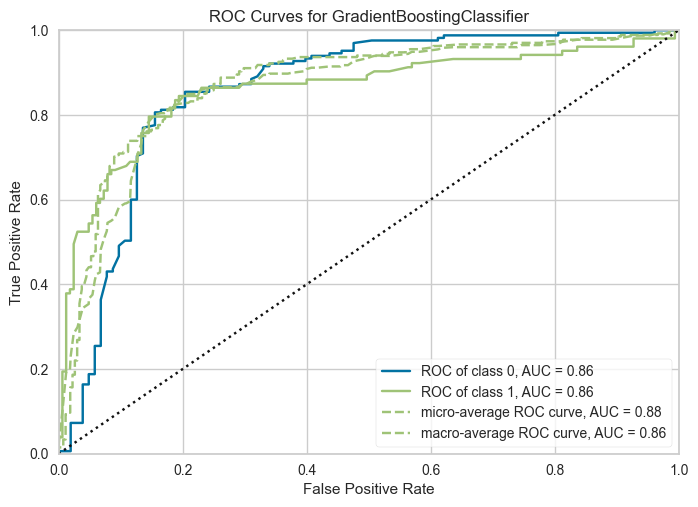

In [98]:
classification.plot_model(gbc_model)

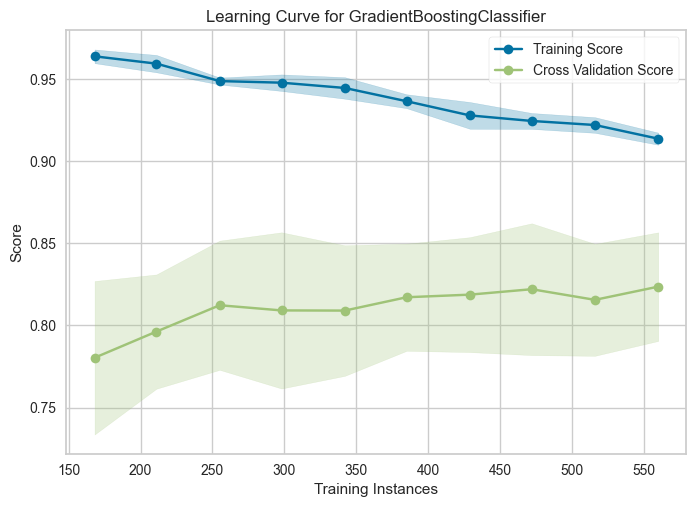

In [99]:
classification.plot_model(estimator = gbc_model, plot = 'learning')

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

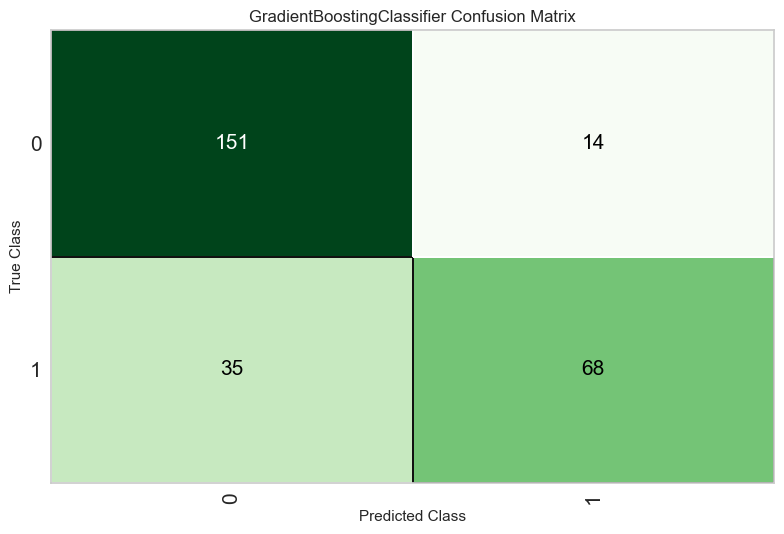

In [100]:
# Evaluate the model
evaluate_model(gbc_model)
plot_model(gbc_model, plot='confusion_matrix')

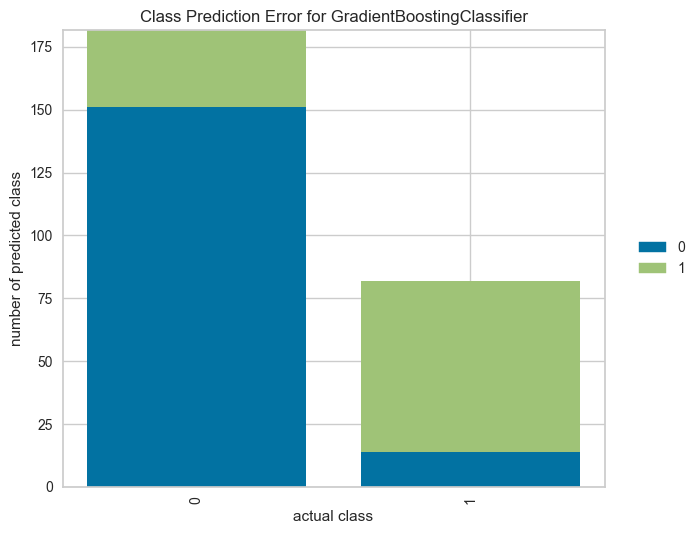

In [101]:
classification.plot_model(gbc_model, plot = 'error')

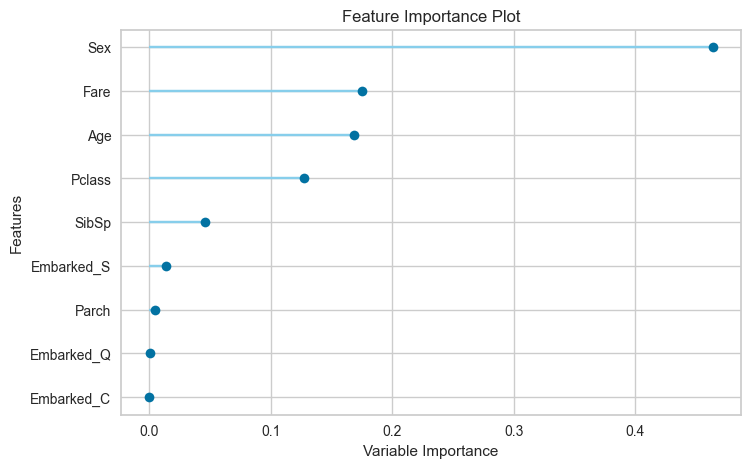

In [102]:
classification.plot_model(gbc_model, plot='feature')

In [103]:
lgbm = classification.create_model('lightgbm');
rf =classification.create_model('rf');

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8730,0.8793,0.7917,0.8636,0.8261,0.7264,0.7281
1,0.7302,0.8365,0.5417,0.6842,0.6047,0.4040,0.4104
2,0.7937,0.8349,0.6250,0.7895,0.6977,0.5442,0.5528
3,0.8387,0.9331,0.8261,0.7600,0.7917,0.6605,0.6620
4,0.8226,0.8904,0.6250,0.8824,0.7317,0.6049,0.6249
5,0.8710,0.8991,0.7917,0.8636,0.8261,0.7238,0.7256
6,0.8065,0.8311,0.6667,0.8000,0.7273,0.5792,0.5850
7,0.8387,0.7511,0.6667,0.8889,0.7619,0.6437,0.6589
8,0.8548,0.9024,0.8333,0.8000,0.8163,0.6964,0.6968


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7778,0.8419,0.7500,0.6923,0.7200,0.5363,0.5375
1,0.6984,0.8264,0.5000,0.6316,0.5581,0.3339,0.3391
2,0.8254,0.8606,0.7500,0.7826,0.7660,0.6268,0.6272
3,0.8387,0.9181,0.8261,0.7600,0.7917,0.6605,0.6620
4,0.8871,0.8635,0.7500,0.9474,0.8372,0.7526,0.7646
5,0.9032,0.9079,0.8333,0.9091,0.8696,0.7929,0.7948
6,0.7903,0.8640,0.6667,0.7619,0.7111,0.5477,0.5507
7,0.8226,0.7588,0.6250,0.8824,0.7317,0.6049,0.6249
8,0.8065,0.8421,0.7500,0.7500,0.7500,0.5921,0.5921


In [104]:
blend = classification.blend_models(estimator_list=[gbc_model,lgbm,rf])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8413,0.8835,0.7500,0.8182,0.7826,0.6580,0.6595
1,0.7460,0.8515,0.5417,0.7222,0.6190,0.4343,0.4445
2,0.7937,0.8510,0.6250,0.7895,0.6977,0.5442,0.5528
3,0.8710,0.9387,0.8261,0.8261,0.8261,0.7235,0.7235
4,0.8387,0.8849,0.6250,0.9375,0.7500,0.6379,0.6664
5,0.8871,0.8969,0.8333,0.8696,0.8511,0.7602,0.7607
6,0.8387,0.8629,0.6667,0.8889,0.7619,0.6437,0.6589
7,0.8387,0.7401,0.6667,0.8889,0.7619,0.6437,0.6589
8,0.8548,0.8827,0.8333,0.8000,0.8163,0.6964,0.6968


In [105]:
predictions = classification.predict_model(gbc_model, data=test_data)
predictions.head(20)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,prediction_label,prediction_score
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.829200,NaN,Q,Mr,1,0.7657
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.000000,NaN,S,Mrs,0,0.9546
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.687500,NaN,Q,Mr,1,0.6896
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.662500,NaN,S,Mr,0,0.5241
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.287500,NaN,S,Mrs,0,0.7001
5,897,3,"Svensson, Mr. Johan Cervin",0,14.0,0,0,7538,9.225000,NaN,S,Mr,0,0.6480
6,898,3,"Connolly, Miss. Kate",1,30.0,0,0,330972,7.629200,NaN,Q,Miss,1,0.7103
7,899,2,"Caldwell, Mr. Albert Francis",0,26.0,1,1,248738,29.000000,NaN,S,Mr,1,0.8585
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",1,18.0,0,0,2657,7.229200,NaN,C,Mrs,1,0.8705
9,901,3,"Davies, Mr. John Samuel",0,21.0,2,0,A/4 48871,24.150000,NaN,S,Mr,0,0.6591


In [106]:
classification.save_model(gbc_model, 'titanic_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Pclass', 'Age', 'SibSp', 'Parch',
                                              'Fare'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('categorical_imputer',
                  TransformerWrapper(exclude=None, include=['Sex...
                                             criterion='friedman_mse', init=None,
                                             lear

In [107]:
#sub_data['Survived'] = round(predictions['prediction_label']).astype(int)
#sub_data.to_csv('submission14.csv',index=False)
#sub_data.head(10)

,PassengerId,Survived
0,892,1
1,893,0
2,894,1
3,895,0
4,896,0
5,897,0
6,898,1
7,899,1
8,900,1
9,901,0


# CatBoost

In [108]:
classification_catboost	 = classification.create_model('catboost')

ValueError: Estimator catboost not available. Please see docstring for list of available estimators.